<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L8_Simple_Adam_vs_Gradient_Descent_Code_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


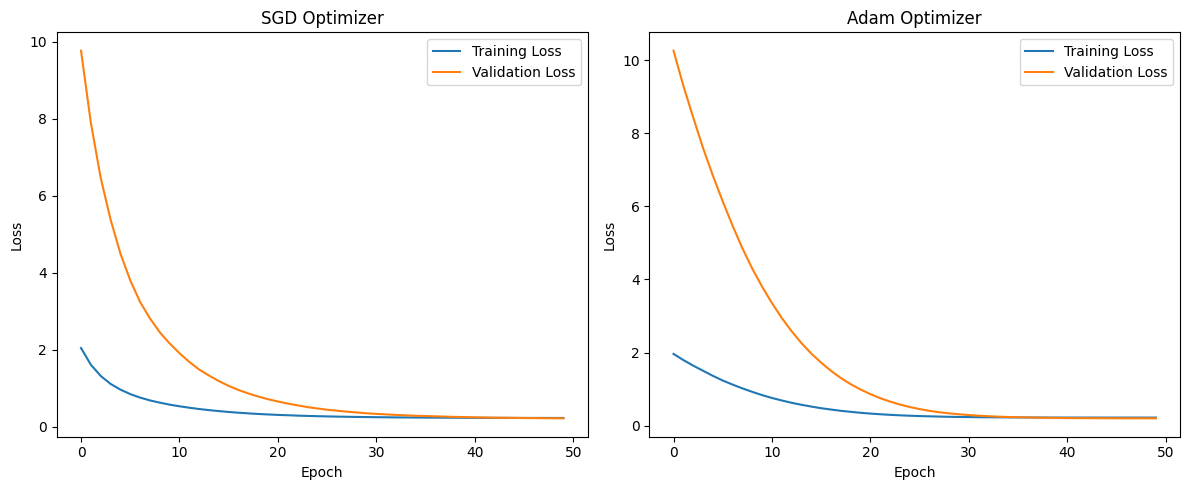

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


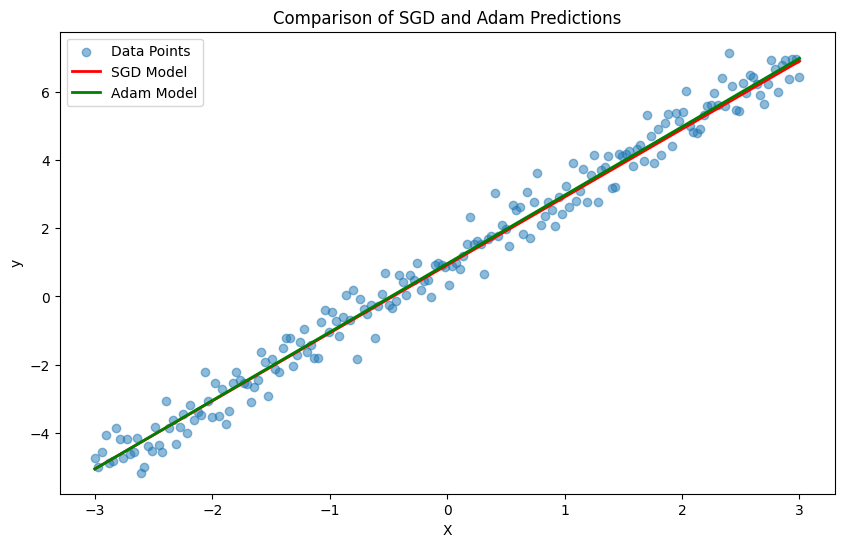

SGD Model:
Weight: 1.9945
Bias: 0.9226

Adam Model:
Weight: 2.0087
Bias: 0.9634

Comparing convergence speed:
SGD reached the threshold at epoch: 18
Adam reached the threshold at epoch: 20
Adam was -2 epochs faster!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate some sample data (a simple linear relationship with noise)
np.random.seed(42)
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(200, 1) * 0.5

# Split the data into training and testing sets
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

# Function to create a simple model
def create_model():
    model = Sequential([
        Dense(1, input_shape=(1,))  # Simple linear model
    ])
    return model

# Train with gradient descent (SGD)
model_sgd = create_model()
model_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='mse'
)

# Keep track of the losses during training
history_sgd = model_sgd.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=0,
    validation_data=(X_test, y_test)
)

# Train with Adam
model_adam = create_model()
model_adam.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

# Keep track of the losses during training
history_adam = model_adam.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=0,
    validation_data=(X_test, y_test)
)

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Plot SGD loss
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Adam loss
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.title('Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare predictions visually
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X, model_sgd.predict(X), 'r-', linewidth=2, label='SGD Model')
plt.plot(X, model_adam.predict(X), 'g-', linewidth=2, label='Adam Model')
plt.title('Comparison of SGD and Adam Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print final weights and biases
print("SGD Model:")
print(f"Weight: {model_sgd.layers[0].get_weights()[0][0][0]:.4f}")
print(f"Bias: {model_sgd.layers[0].get_weights()[1][0]:.4f}")

print("\nAdam Model:")
print(f"Weight: {model_adam.layers[0].get_weights()[0][0][0]:.4f}")
print(f"Bias: {model_adam.layers[0].get_weights()[1][0]:.4f}")

print("\nComparing convergence speed:")
# Find the epoch where each model reaches a certain loss threshold
threshold = history_adam.history['loss'][-1] * 1.5  # 50% above final Adam loss

sgd_convergence = next((i for i, loss in enumerate(history_sgd.history['loss']) if loss <= threshold), 50)
adam_convergence = next((i for i, loss in enumerate(history_adam.history['loss']) if loss <= threshold), 50)

print(f"SGD reached the threshold at epoch: {sgd_convergence}")
print(f"Adam reached the threshold at epoch: {adam_convergence}")
print(f"Adam was {sgd_convergence - adam_convergence} epochs faster!")